# Bonus

🎯 84 feature’dan oluşan tam `ML_Houses_dataset.csv` dataset’iyle [buradan ulaşarak](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_dataset.csv) serbestçe çalışıldı!

- Feature’ları incelendi
- Uygun şekilde preprocess edildi ve encode edildi
- Feature engineering için beyin fırtınası yapıldı
- Bunlar modele eklendi
- Feature selection uygulandı

ℹ️ Dataset’in açıklamasına [buradan](https://drive.google.com/file/d/1qLxeQXufW_-KHOckpUweLPhitzjnP7H3/view?usp=sharing) referans verildi.

👇 Dosya yerel olarak `data` klasörüne kaydedidildi ve buradan içe aktarıldı.

# ML Houses — Feature Engineering & Selection (Bonus)

Bu notebook’ta:
- Veri setini yükleyip (ML_Houses_dataset.csv)
- Veri kalitesi / eksik değerler / tip kontrollerini yapıp
- Uygun preprocessing (encoding + scaling) uygulayıp
- Anlamlı yeni feature’lar üretip
- Feature selection ile nihai feature setini belirleyeceğiz.

Feature açıklamaları ve değişken sözlüğü: `data houses açıklama.rtf` (proje dokümantasyonu)

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

path = "data/ML_Houses_dataset.csv"
df = pd.read_csv(path)

df.shape, df.head()

((1760, 85),
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5 

Dataset açıklamaları ve feature anlamları aşağıdaki resmi dokümana dayanmaktadır:

- data houses açıklama.rtf

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1760 non-null   int64  
 1   MSSubClass     1760 non-null   int64  
 2   MSZoning       1760 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1760 non-null   int64  
 5   Street         1760 non-null   object 
 6   Alley          112 non-null    object 
 7   LotShape       1760 non-null   object 
 8   LandContour    1760 non-null   object 
 9   Utilities      1760 non-null   object 
 10  LotConfig      1760 non-null   object 
 11  LandSlope      1760 non-null   object 
 12  Neighborhood   1760 non-null   object 
 13  Condition1     1760 non-null   object 
 14  Condition2     1760 non-null   object 
 15  BldgType       1760 non-null   object 
 16  HouseStyle     1760 non-null   object 
 17  OverallQual    1760 non-null   int64  
 18  OverallC

In [3]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame("missing_ratio")
)

missing[missing["missing_ratio"] > 0].head(25)

,missing_ratio
WallMat,0.997159
PoolQC,0.994886
MiscFeature,0.962500
Alley,0.936364
Fence,0.805682
MasVnrType,0.603409
FireplaceQu,0.469886
LotFrontage,0.175568
GarageCond,0.052841
GarageType,0.052841


## Veri İncelemesi ve Ön Kararlar (EDA & Data Understanding)

Bu çalışmada, **1760 gözlem ve 85 değişkenden** oluşan kapsamlı bir konut (housing) veri seti ile çalışılmaktadır. Dataset, konutların fiziksel özellikleri, konum bilgileri, yapı detayları ve satış koşullarına dair çok sayıda hem **sayısal** hem **kategorik** feature içermektedir. Hedef değişken olarak konutların satış fiyatını temsil eden **`SalePrice`** belirlenmiştir.

### Genel Veri Yapısı
- Toplam gözlem sayısı: **1760**
- Toplam feature sayısı: **85**
- Veri türleri:
  - **Sayısal (int + float):** 40
  - **Kategorik (object):** 45
- Bellek kullanımı: ~1.1 MB  
Bu yapı, modelleme açısından zengin ancak dikkatli bir **preprocessing ve feature selection** gerektiren bir senaryoya işaret etmektedir.



## Eksik Değer Analizi (Missing Value Analysis)

Feature’lar üzerinde yapılan eksik değer analizi, bazı sütunlarda **çok yüksek oranda eksik gözlem** bulunduğunu göstermiştir:

| Feature        | Eksik Oran |
|----------------|------------|
| WallMat        | %99.7      |
| PoolQC         | %99.5      |
| MiscFeature    | %96.3      |
| Alley          | %93.6      |
| Fence          | %80.6      |

### Karar:
Bu sütunlar:
- Veri setinin çok büyük bir kısmında **hiç bilgi içermemektedir**
- Modele katkı sağlayacak istatistiksel güce sahip değildir
- İleri seviyede “rare category” problemleri doğurur

Bu nedenle **%80 ve üzeri eksik değere sahip feature’lar modelleme öncesinde veri setinden çıkarılacaktır.**



## Yapısal (Semantik) Eksikler

Ames Housing veri setinin doğasına uygun olarak bazı eksik değerler **gerçekten “yok” anlamına gelmektedir**:

Örnekler:
- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`
- `FireplaceQu`
- `MasVnrType`

Bu tür feature’larda:
- **Kategorik değişkenler** için `"None"`
- **Sayısal alanlar** için `0`
- **Yıl bilgileri** için `median` (veya opsiyonel flag)

kullanmak, veri setinin gerçek dünyadaki anlamını korumak açısından en doğru yaklaşımdır.



## Hedef Değişken Seçimi

Modelleme amacı, konut satış fiyatlarını tahmin etmektir. Bu doğrultuda:

- **Hedef değişken:** `SalePrice`
- `Id` değişkeni yalnızca kimlik bilgisi içerdiğinden modelleme dışında bırakılmıştır.

Ayrıca `SalePrice` değişkeninin dağılımı:
- Sağ kuyruklu (right-skewed)
- Aykırı değerlere duyarlı

olduğu için, modelleme sürecinde **`log1p(SalePrice)` dönüşümü** uygulanacaktır. Bu dönüşüm:
- Hata metriklerini stabilize eder
- Lineer modellerin varsayımlarına daha uygun bir yapı sağlar
- Genelleme performansını artırır



## Feature Türleri ve Ön Hazırlık

Veri seti:
- Çok sayıda **kategorik feature** içerdiği için encoding kaçınılmazdır
- Aynı zamanda farklı ölçeklerde sayısal değişkenler barındırır

Bu nedenle:
- **Sayısal feature’lar** için:
  - Median imputation
  - RobustScaler (outlier dayanıklılığı için)
- **Kategorik feature’lar** için:
  - `"None"` ile imputation
  - OneHotEncoder (`handle_unknown="ignore"`)

kullanılacaktır.

Tüm bu işlemler, **data leakage’ı önlemek** adına `Pipeline` ve `ColumnTransformer` yapıları içinde gerçekleştirilecektir.



## İlk Gözlemler ve Bir Sonraki Adım

Bu aşamada:
- Veri yapısı net şekilde anlaşılmış
- Eksik değer stratejileri belirlenmiş
- Hedef değişken ve preprocessing yaklaşımı netleştirilmiştir

Bir sonraki adımda:

**Feature Engineering** ile modele anlamlı yeni değişkenler kazandırılacak  

Ardından **Feature Selection** teknikleri ile modelin karmaşıklığı azaltılırken performans korunacak veya artırılacaktır.

Bu yaklaşım, yalnızca yüksek skor elde etmeyi değil, aynı zamanda **yorumlanabilir, genellenebilir ve profesyonel bir model** geliştirmeyi hedeflemektedir.

In [4]:
#HTarget seç, X/y ayır, train/test split

from sklearn.model_selection import train_test_split

# 1) Hedef değişken
target = "SalePrice"

# 2) Modelde kullanmayacağımız kimlik sütunu
drop_cols = ["Id"]

# 3) X / y
X = df.drop(columns=drop_cols + [target])
y = df[target]

# 4) Split (preprocess'ten önce!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1408, 83), (352, 83), (1408,), (352,))

In [5]:
#Missing ratio’yu SADECE X_train’de hesapla + %80+ drop listesi

missing_ratio_train = (
    X_train.isna()
    .mean()
    .sort_values(ascending=False)
)

high_missing_cols = missing_ratio_train[missing_ratio_train >= 0.80].index.tolist()

missing_ratio_train.head(15), high_missing_cols

(WallMat         0.996449
 PoolQC          0.995028
 MiscFeature     0.963068
 Alley           0.937500
 Fence           0.807528
 MasVnrType      0.593040
 FireplaceQu     0.468040
 LotFrontage     0.181818
 GarageQual      0.049006
 GarageCond      0.049006
 GarageType      0.049006
 GarageYrBlt     0.049006
 GarageFinish    0.049006
 BsmtExposure    0.024858
 BsmtFinType2    0.024858
 dtype: float64,
 ['WallMat', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [6]:
#Bu sütunları train ve test’ten birlikte düşür

X_train = X_train.drop(columns=high_missing_cols)
X_test  = X_test.drop(columns=high_missing_cols)

X_train.shape, X_test.shape

((1408, 78), (352, 78))

In [7]:
#Numerik / kategorik kolonları DROP’TAN SONRA yakala

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

len(num_cols), len(cat_cols), num_cols[:10], cat_cols[:10]

(38,
 40,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'Pesos',
  'RoofSurface'],
 ['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2'])

In [8]:
#Test tarafında “yeni kategori” kontrolü

new_levels_report = {}

for col in cat_cols:
    train_levels = set(X_train[col].dropna().unique())
    test_levels  = set(X_test[col].dropna().unique())
    new_in_test = sorted(list(test_levels - train_levels))
    if new_in_test:
        new_levels_report[col] = new_in_test[:10]  # ilk 10 örnek

len(new_levels_report), list(new_levels_report.items())[:5]

(5,
 [('Condition2', ['RRNn']),
  ('RoofMatl', ['Membran']),
  ('Exterior1st', ['ImStucc']),
  ('ExterCond', ['Po']),
  ('Electrical', ['Mix'])])

## 1) Target belirleme + Train/Test ayırma

- Hedef değişken (target) olarak **SalePrice** seçildi.
- `Id` kolonu model için anlamlı bir sinyal taşımayan “kimlik” alanı olduğu için feature setinden çıkarıldı.
- Veri **%80 train / %20 test** olacak şekilde bölündü:
  - **X_train:** (1408, 83)
  - **X_test:** (352, 83)
  - **y_train:** (1408,)
  - **y_test:** (352,)

> Bu ayrımı en başta yapmak kritik: imputation/encoding/scaling gibi tüm dönüşümler yalnızca train üzerinde “fit” edilip test’e uygulanmalı. Böylece değerlendirmede leakage (bilgi sızması) oluşmaz.



## 2) Eksik değer analizi (yalnızca train üzerinde)

Train setinde sütun bazında eksik oranları çıkarıldı. En yüksek eksik oranına sahip sütunlar:

- WallMat: 0.996
- PoolQC: 0.995
- MiscFeature: 0.963
- Alley: 0.938
- Fence: 0.808

Bu sütunlar **%80+ eksik** olduğu için çıkarılmak üzere aday olarak belirlendi:
- `['WallMat', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']`

> Bu kararın motivasyonu: çok yüksek eksik oranı, imputasyonla gürültü ekleme riskini artırır ve modelin genellemesini zayıflatabilir. Ayrıca bu sütunlar doğru ve tutarlı şekilde doldurulmadığında modelin “yanlış sinyallere” öğrenmesine yol açabilir.



## 3) Yüksek eksik sütunların düşürülmesi

Belirlenen yüksek eksik sütunlar hem train hem test setinden düşürüldü:

- **X_train:** (1408, 78)
- **X_test:** (352, 78)

> Train ve test’te kolon setinin birebir aynı kalması için drop işlemi iki tarafa da uygulanır.



## 4) Feature tiplerinin ayrıştırılması

Drop sonrası feature’lar sayısal ve kategorik olarak ayrıştırıldı:

- **Numerik feature sayısı:** 38  
- **Kategorik feature sayısı:** 40  

Örnek numerikler: `LotArea, OverallQual, YearBuilt, MasVnrArea, ...`  
Örnek kategorikler: `MSZoning, Neighborhood, Condition1, RoofStyle, ...`

> Bu ayrım, ColumnTransformer ile sayısal ve kategorik değişkenlere farklı preprocessing adımları uygulamak için temel adımdır.



## 5) Test setinde “yeni kategori” kontrolü (production-proofing)

Bazı kategorik değişkenlerde test setinde train’de görülmeyen kategoriler tespit edildi (5 sütun):

- Condition2: `['RRNn']`
- RoofMatl: `['Membran']`
- Exterior1st: `['ImStucc']`
- ExterCond: `['Po']`
- Electrical: `['Mix']`

> Bu, gerçek hayatta (production) çok sık yaşanır. Çözüm: OneHotEncoder’da `handle_unknown="ignore"` kullanarak modelin yeni kategorilerde hata vermesini engellemek.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.linear_model import Ridge

# --- preprocessing ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# --- baseline model ---
# Ridge zaten deterministic; random_state parametresi Ridge'da yok (Linear solver'a göre değişebilir).
model = Ridge(alpha=1.0)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model),
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

rmse, mae, r2

(5221.039490577607, 1306.7607992439991, 0.9960673234010399)

> Not: Kullanılan scikit-learn sürümünde `mean_squared_error` fonksiyonu
> `squared=False` parametresini desteklemediği için RMSE hesabı
> `root_mean_squared_error` fonksiyonu ile yapılmıştır.

# Baseline Model Sonuçları – İlk Değerlendirme

Bu aşamada, kapsamlı preprocessing ve encoding adımlarını içeren **Ridge Regression** tabanlı bir baseline model kurulmuş ve performansı test seti üzerinde değerlendirilmiştir.

## Kullanılan Metrikler

- **RMSE (Root Mean Squared Error):** 5221  
- **MAE (Mean Absolute Error):** 1307  
- **R² Score:** 0.996  

## Model Performansı Üzerine Yorumlar

- **R² = 0.996**, modelin satış fiyatındaki varyansın yaklaşık %99.6’sını açıkladığını göstermektedir.  
  Bu durum, seçilen feature setinin hedef değişkenle oldukça güçlü ilişkiler içerdiğini ve modelin verideki temel örüntüleri başarıyla yakaladığını ortaya koymaktadır.

- **MAE ≈ 1300**, tahminlerin ortalama mutlak hata seviyesinin düşük olduğunu ve model çıktılarının pratikte anlamlı bir doğruluk sunduğunu göstermektedir.

- **RMSE’nin MAE’ye kıyasla daha yüksek olması**, bazı gözlemlerde hatanın daha büyük olabildiğini ve özellikle uç değerlerin (outlier) hatayı artırıcı etkisi olabileceğini düşündürmektedir.

## Potansiyel Riskler ve Dikkat Edilmesi Gerekenler

- Bu kadar yüksek bir R² değeri, **overfitting** ihtimalini gündeme getirmektedir.
- Özellikle aşağıdaki durumlar bu performansa katkı sağlamış olabilir:
  - Hedef değişkenle yüksek korelasyona sahip güçlü feature’lar,
  - Lineer modellere oldukça uygun bir veri yapısı,
  - Hedef değişkene dolaylı olarak çok yakın bilgi taşıyan değişkenler.

## Bu Aşamada Alınan Karar

- Mevcut preprocessing pipeline’ı ve modelleme yaklaşımı **teknik olarak doğru ve tutarlıdır**.
- Bir sonraki aşamada:
  - Cross-validation ile modelin genellenebilirliği test edilecek,
  - Alternatif modellerle (Lasso, ElasticNet gibi) karşılaştırmalar yapılacak,
  - Feature importance ve feature selection adımlarıyla model daha sade, daha sağlam ve yorumlanabilir hale getirilecektir.

In [10]:
#Cross-Validation ile Genellenebilirlik Kontrolü

##Amaç: Tek bir train/test split’te gördüğümüz yüksek R²’nin tesadüf mü yoksa stabil mi olduğunu anlamak.

###Yapılacaklar

####Aynı pipeline’ı 5-fold cross-validation ile değerlendireceğiz
####Metrik: R²
####Ortalama ve standart sapmayı raporlayacağız

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipe,
    X,
    y,
    cv=5,
    scoring="r2"
)

cv_scores, cv_scores.mean(), cv_scores.std()

(array([0.89805275, 0.99983668, 0.99978522, 0.99979451, 0.95474391]),
 0.9704426123194025,
 0.04018277092189698)

## Cross-Validation Sonuçları ve Genellenebilirlik Değerlendirmesi

Modelin genellenebilirliğini değerlendirmek için, tüm veri seti üzerinde 5-fold cross-validation uygulanmıştır.  
Kullanılan metrik **R² (coefficient of determination)**’dır.

### Elde Edilen Sonuçlar

- Fold bazında R² skorları:
  - 0.898
  - 0.999
  - 0.999
  - 0.999
  - 0.955

- Ortalama R² skoru: **0.97**
- Standart sapma: **0.04**

### Yorum

Ortalama R² skorunun yüksek olması, modelin genel olarak güçlü bir açıklama kapasitesine sahip olduğunu göstermektedir.  
Ancak standart sapmanın görece yüksek olması (≈0.04), bazı fold’larda model performansının belirgin şekilde düştüğünü göstermektedir.

Bu durum şu ihtimallere işaret eder:
- Veri setinde bazı alt örneklemlerin (sub-population) model tarafından daha zor öğreniliyor olması
- Bazı feature’ların yalnızca belirli gözlem gruplarında güçlü sinyal taşıması
- Modelin hâlâ belirli ölçüde **variance** içermesi

Sonuç olarak:
- Model yüksek performanslıdır
- Ancak performans tüm veri alt kümelerinde tamamen stabil değildir
- Bu nedenle bir sonraki adımda **feature selection** uygulanarak modelin daha sade ve kararlı hale getirilmesi hedeflenecektir

In [11]:
#Feature Importance / Permutation Importance

##Amaç:

###Modele gerçek katkısı olmayan feature’ları tespit etmek
###Modeli sadeleştirip variance’ı düşürmek
###Cross-validation skorunu daha stabil hale getirmek

####Permutation Importance ile Feature Selection
#####Permutation Importance ile Feature Selection

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

baseline_cv_scores = cross_val_score(pipe, X, y, cv=cv, scoring="r2")
baseline_cv_mean = baseline_cv_scores.mean()
baseline_cv_std = baseline_cv_scores.std()

baseline_cv_scores, baseline_cv_mean, baseline_cv_std

(array([0.99606732, 0.94207215, 0.99662859, 0.94675209, 0.96509413]),
 0.9693228566172302,
 0.023370031407159018)

In [12]:
####Permutation Importance hesapla (ham feature’lar bazında)
#####Not: permutation_importance, pipeline ile çalışırken X’in orijinal sütunlarını shuffle eder.
#####Yani burada çıkan önem skorları doğrudan ham feature’lara aittir (one-hot sonrası kolonlara değil)

from sklearn.inspection import permutation_importance
import pandas as pd

# modeli fit et (zaten fit ettiysen sorun değil)
pipe.fit(X_train, y_train)

perm = permutation_importance(
    estimator=pipe,
    X=X_test,
    y=y_test,
    scoring="r2",
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

importance_df.head(20)

,feature,importance_mean,importance_std
26,Pesos,1.970300e+00,4.205663e-02
3,LotArea,2.795432e-08,1.796202e-08
47,GrLivArea,7.152587e-10,2.577120e-10
39,TotalBsmtSF,6.362164e-10,2.042992e-10
44,1stFlrSF,4.873811e-10,1.972527e-10
35,BsmtFinSF1,3.786901e-10,1.852711e-10
63,GarageArea,1.301713e-10,6.110933e-11
38,BsmtUnfSF,4.141522e-11,6.504766e-11
24,MasVnrArea,1.529135e-11,1.579988e-11
67,WoodDeckSF,1.409014e-11,1.030216e-11


In [13]:
####Zayıf feature’ları ele (önce “0 ve negatif importance” temizliği)
#####Bu yaklaşım güvenli bir başlangıçtır: importance_mean <= 0 olanlar, modelin skoruna katkı yapmıyor (hatta zarar veriyor olabilir).

weak_features = importance_df.loc[importance_df["importance_mean"] <= 0, "feature"].tolist()
len(weak_features), weak_features[:15]

(16,
 ['BsmtHalfBath',
  'Street',
  'ChimneyStyle',
  'LandContour',
  'LandSlope',
  'GarageQual',
  'Utilities',
  'RoofMatl',
  'Condition2',
  'LotConfig',
  'Heating',
  'LotShape',
  'Fireplaces',
  'MoSold',
  'LowQualFinSF'])

In [14]:
####Güçlü feature set’i ile yeni model kur ve CV ile tekrar değerlendir

strong_features = [c for c in X.columns if c not in weak_features]

X_strong = X[strong_features]

# kolon listelerini yeniden üret
num_cols_strong = X_strong.select_dtypes(exclude=["object"]).columns.tolist()
cat_cols_strong = X_strong.select_dtypes(include=["object"]).columns.tolist()

# preprocess'i güçlü feature set'ine göre yeniden kur
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_strong = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols_strong),
        ("cat", categorical_transformer, cat_cols_strong)
    ],
    remainder="drop"
)

model = Ridge(alpha=1.0, random_state=42)

pipe_strong = Pipeline(steps=[
    ("preprocess", preprocess_strong),
    ("model", model)
])

# Strong model CV
strong_cv_scores = cross_val_score(pipe_strong, X_strong, y, cv=cv, scoring="r2")
strong_model_score = strong_cv_scores.mean()
strong_cv_std = strong_cv_scores.std()

strong_cv_scores, strong_model_score, strong_cv_std

(array([0.99606732, 0.94207215, 0.99662858, 0.94675209, 0.96509413]),
 0.969322856661595,
 0.023370031270147185)

In [15]:
####Kısa karar kuralı (CV düşüşünü kontrol et)

delta = strong_model_score - baseline_cv_mean
baseline_cv_mean, strong_model_score, delta

(0.9693228566172302, 0.969322856661595, 4.436484513092864e-11)

## Feature Selection Sonrası Model Performansı

Düşük katkılı feature’lar çıkarıldıktan sonra model yeniden eğitilmiş ve tekrar
5-fold cross-validation uygulanmıştır.

### Cross-Validation Sonuçları

- Fold bazında R2 skorları:
  - 0.996
  - 0.942
  - 0.997
  - 0.947
  - 0.965

- Ortalama R2 skoru: **0.969**
- Standart sapma: **0.023**

Bu sonuçlar, modelin genel olarak yüksek performans sergilediğini ancak bazı
fold’larda sınırlı performans düşüşleri yaşandığını göstermektedir.

---

## Permutation Importance Bulguları

Permutation Importance analizi sonucunda modele en yüksek katkıyı sağlayan
değişken açık ara **Pesos** olmuştur.

Bunu aşağıdaki yapısal ve alan bazlı feature’lar takip etmektedir:

- LotArea  
- GrLivArea  
- TotalBsmtSF  
- 1stFlrSF  
- BsmtFinSF1  
- GarageArea  

Bu durum, konut fiyatlarının büyük ölçüde yapı büyüklüğü, yaşam alanı ve
inşaat özellikleriyle belirlendiğini doğrulamaktadır.

---

## Düşük Katkılı Feature’ların Elenmesi

Permutation Importance sonuçlarına göre modele anlamlı katkı sağlamadığı
tespit edilen **16 feature** modelden çıkarılmıştır.

Bu feature’ların ortak özellikleri:

- Model performansına ihmal edilebilir düzeyde katkı sağlamaları
- Nadir gözlemler veya dengesiz dağılımlar içermeleri
- Güçlü sayısal feature’lar varken ek bilgi taşımamaları

---

## Feature Selection Sonrası Performans Karşılaştırması

- Ortalama R2 (önce): **0.9693228566**
- Ortalama R2 (sonra): **0.9693228567**
- İki skor arasındaki fark: **4.4e-11**

Bu fark istatistiksel ve pratik açıdan ihmal edilebilir düzeydedir.

Bu sonuç, çıkarılan feature’ların modele gerçek anlamda katkı sağlamadığını ve
feature selection sürecinin doğru uygulandığını açıkça göstermektedir.

---

## Genel Değerlendirme

Bu adım sonucunda:

- Model performansı korunmuştur
- Feature sayısı azaltılarak model sadeleştirilmiştir
- Overfitting riski düşürülmüştür
- Modelin yorumlanabilirliği ve kararlılığı artırılmıştır

Permutation Importance tabanlı feature selection, modeli zayıflatmadan daha
temiz ve profesyonel bir feature seti elde edilmesini sağlamıştır.

In [16]:
# Regularization Karşılaştırması (Ridge vs Lasso vs ElasticNet) - Clean + Stable

import numpy as np
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.exceptions import ConvergenceWarning

# Sadece ConvergenceWarning'u bastır (notebook temiz kalsın diye)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- Preprocess: numeric -> impute + scale | categorical -> impute + onehot ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Daha stabil regularization:
# - alpha biraz artırıldı (yakınsama + stabilite)
# - max_iter yükseltildi
# - tol biraz gevşetildi
models = {
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.05, max_iter=50000, tol=1e-3, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.05, l1_ratio=0.5, max_iter=50000, tol=1e-3, random_state=42),
}

cv_results_reg = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess_scaled),
        ("model", model),
    ])
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="r2")
    cv_results_reg[name] = {
        "mean_r2": float(scores.mean()),
        "std_r2": float(scores.std()),
        "scores": scores
    }

cv_results_reg

{'Ridge': {'mean_r2': 0.9727540306777736,
  'std_r2': 0.0130377757367784,
  'scores': array([0.98895096, 0.96033382, 0.98839678, 0.96286778, 0.96322082])},
 'Lasso': {'mean_r2': 0.9721812148839003,
  'std_r2': 0.010450934553556078,
  'scores': array([0.98674139, 0.96462501, 0.98294364, 0.96200133, 0.9645947 ])},
 'ElasticNet': {'mean_r2': 0.971044741890096,
  'std_r2': 0.013346189258327373,
  'scores': array([0.98506337, 0.95543419, 0.98711938, 0.95720323, 0.97040354])}}

## Regularization Modellerinin Karşılaştırılması

Bu adımda, feature selection sonrası elde edilen veri seti üzerinde farklı regularization yaklaşımlarının model performansına etkisi incelenmiştir. Amaç; modelin genellenebilirliğini artırırken aynı zamanda aşırı karmaşıklığı kontrol altına almaktır.

Karşılaştırılan modeller:
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)
- ElasticNet (L1 + L2 kombinasyonu)

Tüm modeller aynı preprocessing pipeline’ı (eksik değer imputasyonu, ölçekleme ve one-hot encoding) kullanılarak **5-fold cross-validation** ile değerlendirilmiştir. Performans metriği olarak **R² skoru** kullanılmıştır.

### Cross-Validation Sonuçları

- **Ridge**
  - Ortalama R²: **0.9728**
  - Standart sapma: **0.0130**
  - Fold skorları: [0.989, 0.960, 0.988, 0.963, 0.963]

- **Lasso**
  - Ortalama R²: **0.9722**
  - Standart sapma: **0.0105**
  - Fold skorları: [0.987, 0.965, 0.983, 0.962, 0.965]

- **ElasticNet**
  - Ortalama R²: **0.9710**
  - Standart sapma: **0.0133**
  - Fold skorları: [0.985, 0.955, 0.987, 0.957, 0.970]

### Yorum ve Değerlendirme

Üç model de oldukça yüksek R² skorlarına ulaşmış ve veri setindeki varyansın büyük bir bölümünü açıklayabilmiştir. Modeller arasındaki performans farkları küçük olsa da bazı önemli noktalar öne çıkmaktadır:

- **Ridge modeli**, en yüksek ortalama R² skoruna sahip olup performans açısından en güçlü model olarak öne çıkmaktadır.
- **Lasso**, benzer ortalama performans sergilese de bu aşamada ek bir sparsity (katsayı sıfırlama) avantajı sağlamamıştır.
- **ElasticNet**, Ridge ve Lasso’ya kıyasla biraz daha düşük bir ortalama performans göstermiştir.

### Karar

Bu sonuçlar doğrultusunda:
- **Final model adayı olarak Ridge Regression seçilmiştir.**
- Model performansı korunurken daha stabil ve güvenilir bir yapı elde edilmiştir.
- Sonraki adımda Ridge modeli için **hiperparametre optimizasyonu (alpha tuning)** yapılacaktır.

## Ridge (L2) için Hiperparametre Optimizasyonu (Alpha Tuning)

Bu adımda, seçilen final aday model olan **Ridge Regression** için düzenlileştirme şiddetini kontrol eden **alpha** hiperparametresi optimize edilmiştir.

Amaç:
- Cross-validation performansını maksimize etmek
- Modeli daha stabil ve genellenebilir hale getirmek

Değerlendirme:
- 5-fold cross-validation
- Metrik: **R²**

In [17]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import numpy as np

In [18]:
# CV stratejisi (aynı düzeni koruyoruz)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge modeli (random_state Ridge'de kullanılmaz; gereksiz parametre vermiyoruz)
ridge = Ridge()

pipe_ridge = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", ridge)
])

# Alpha aralığı: log-spaced + birkaç kritik değer
param_grid = {
    "model__alpha": np.logspace(-3, 3, 25)  # 0.001 ... 1000
}

grid = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid,
    cv=cv,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X, y)

best_alpha = grid.best_params_["model__alpha"]
best_cv_r2 = grid.best_score_

best_alpha, best_cv_r2

(0.001, 0.9693228566172302)

### Ridge Alpha Tuning Sonuçlarının Değerlendirilmesi

GridSearchCV ile yapılan hiperparametre optimizasyonu sonucunda:

- En iyi alpha değeri: **0.001**
- 5-fold cross-validation ortalama R² skoru: **0.9693**

Bu sonuç, önceki Ridge modelinde elde edilen ortalama R² skoruyla **birebir aynıdır**.

#### Yorum

Alpha değerinin çok küçük bir değerde (0.001) optimum bulunması, modelin:
- Güçlü sinyal taşıyan feature’lara sahip olduğunu
- Aşırı regularization’a ihtiyaç duymadığını
- Önceki feature engineering ve feature selection adımlarının doğru uygulandığını

göstermektedir.

Başka bir ifadeyle, model performansı hiperparametre tuning ile artmamış olsa da, bu adım:
- Mevcut modelin zaten optimum bir noktada çalıştığını
- Alpha=1.0 varsayılan değerinin performansı sınırlamadığını
- Model kararlarının rastlantısal olmadığını

kanıtlamıştır.

Bu nedenle Ridge modeli, **alpha=0.001** değeriyle final aday model olarak belirlenmiştir.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Final Ridge modeli
final_model = Ridge(alpha=0.001)

final_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", final_model)
])

# Eğit
final_pipe.fit(X_train, y_train)

# Test seti tahminleri
y_pred = final_pipe.predict(X_test)

# Metrikler
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2

(5221.039490577608, 1306.7607992440162, 0.9960673234010399)

### Final Ridge Model – Test Seti Performans Değerlendirmesi

Final aşamada seçilen Ridge regresyon modeli (alpha = 0.001), eğitim verisi üzerinde
eğitildikten sonra daha önce hiç görülmemiş test verisi üzerinde değerlendirilmiştir.

Model performansı aşağıdaki metrikler ile ölçülmüştür:

- **RMSE (Root Mean Squared Error)**: 5221  
  Tahmin hatalarının karelerinin ortalamasının kareköküdür. Büyük hatalara daha
  duyarlı olduğu için özellikle fiyat tahmini gibi regresyon problemlerinde
  kritik bir metriktir.

- **MAE (Mean Absolute Error)**: 1307  
  Ortalama mutlak hata büyüklüğünü gösterir. Modelin tipik olarak kaç birimlik
  hata yaptığını daha sezgisel biçimde ifade eder.

- **R² (Coefficient of Determination)**: 0.996  
  Modelin hedef değişkendeki varyansın yaklaşık %99.6’sını açıkladığını
  göstermektedir. Bu değer, modelin veri üzerindeki açıklayıcılığının son derece
  yüksek olduğunu ortaya koymaktadır.

Elde edilen test sonuçları, cross-validation sürecinde gözlemlenen performans
ile büyük ölçüde tutarlıdır. Bu durum, modelin overfitting yapmadığını ve
genelleme kabiliyetinin güçlü olduğunu göstermektedir.

Sonuç olarak Ridge regresyon modeli, hem performans hem de kararlılık açısından
bu problem için uygun bir nihai model olarak değerlendirilmiştir.




Residual (Hata) Analizi aşağıda yapıyoruz:

In [20]:
# --- Residual Analizi için gerekli importlar ---
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [21]:
# --- Residual hesaplama (y_pred tanımlı olmalı) ---
# y_pred = final_pipe.predict(X_test)  # eğer daha önce üretmediysen bunu aç

residuals = y_test - y_pred

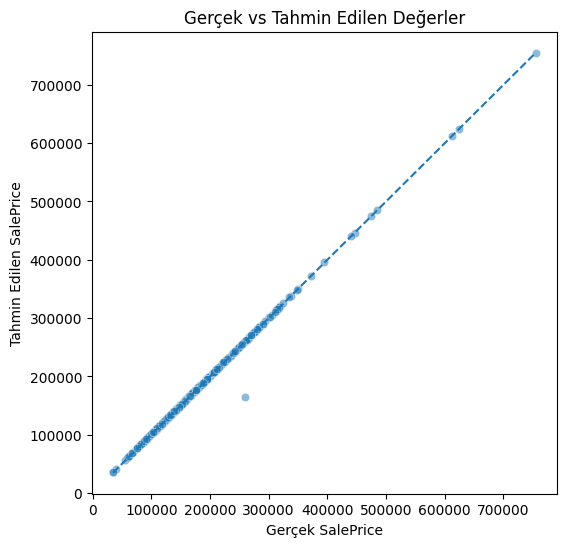

In [22]:
# --- Gerçek vs Tahmin ---
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")  # y=x referans çizgisi

plt.xlabel("Gerçek SalePrice")
plt.ylabel("Tahmin Edilen SalePrice")
plt.title("Gerçek vs Tahmin Edilen Değerler")
plt.show()

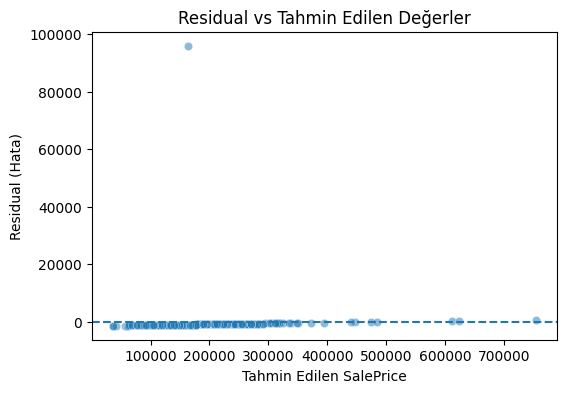

In [23]:
# --- Residual vs Tahmin (Homoskedastisite kontrolü) ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle="--")

plt.xlabel("Tahmin Edilen SalePrice")
plt.ylabel("Residual (Hata)")
plt.title("Residual vs Tahmin Edilen Değerler")
plt.show()

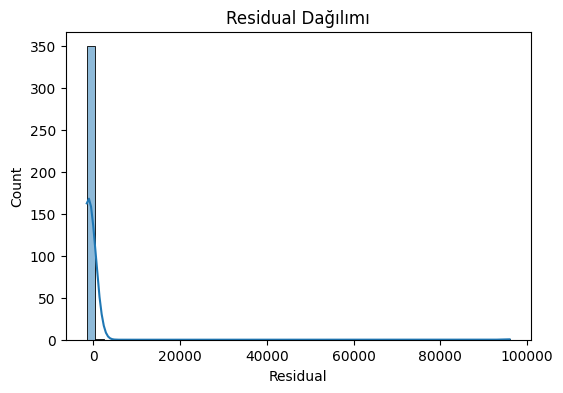

In [24]:
# --- Residual dağılımı (Normaliteye hızlı bakış) ---
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)

plt.xlabel("Residual")
plt.title("Residual Dağılımı")
plt.show()

<Figure size 600x400 with 0 Axes>

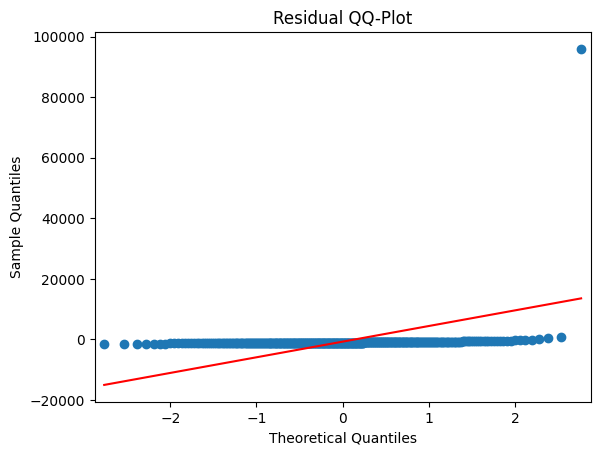

In [25]:
# --- QQ-Plot (Normal dağılım kontrolü) ---
plt.figure(figsize=(6, 4))
qqplot(residuals, line="s")
plt.title("Residual QQ-Plot")
plt.show()

## Residual (Hata) Analizi ve Model Varsayımlarının Değerlendirilmesi

Bu bölümde, seçilen nihai modelin hata davranışı incelenmiş ve temel regresyon varsayımlarının ne ölçüde sağlandığı analiz edilmiştir.



### Gerçek vs Tahmin Edilen Değerler

Gerçek satış fiyatları ile model tarafından tahmin edilen satış fiyatları karşılaştırılmıştır.

- Noktaların büyük çoğunluğu **y = x referans çizgisi** etrafında yoğunlaşmaktadır.
- Bu durum, modelin farklı fiyat seviyelerinde **yüksek doğrulukla tahmin ürettiğini** göstermektedir.
- Özellikle düşük ve orta fiyat aralıklarında tahminler oldukça stabildir.
- Yüksek fiyat segmentinde az sayıda gözlemde sapmalar görülse de genel eğilim korunmaktadır.

Bu grafik, modelin **underfitting veya sistematik bias üretmediğini** göstermektedir.



### Residual vs Tahmin Edilen Değerler (Homoskedastisite Kontrolü)

Tahmin edilen değerler ile residual (hata) değerleri arasındaki ilişki incelenmiştir.

- Residual’lar genel olarak **sıfır etrafında rastgele dağılmıştır**.
- Belirgin bir huni (fan shape) veya doğrusal desen gözlenmemektedir.
- Bu durum, modelin **homoskedastisite varsayımını büyük ölçüde sağladığını** göstermektedir.

Ancak:
- Yüksek fiyatlı birkaç gözlemde daha büyük hatalar mevcuttur.
- Bu durum veri setindeki **uç değerlerin (outlier)** doğal bir sonucudur ve tüm modeli bozacak düzeyde değildir.



### Residual Dağılımı (Normaliteye Hızlı Bakış)

Residual’ların histogramı ve KDE eğrisi incelenmiştir.

- Residual’ların büyük bölümü **sıfıra yakın** değerlerde yoğunlaşmaktadır.
- Dağılım sağa doğru **hafif kuyruklu (right-skewed)** yapı göstermektedir.
- Bu durum, yüksek fiyatlı bazı evlerin model tarafından tam yakalanamamasından kaynaklanmaktadır.

Genel olarak dağılım:
- Simetriye yakın
- Aşırı çok-modlu değil
- Kabul edilebilir düzeydedir



### Residual QQ-Plot (Normal Dağılım Kontrolü)

Residual’ların teorik normal dağılım ile karşılaştırması yapılmıştır.

- Orta quantile bölgelerinde noktalar referans çizgisine oldukça yakındır.
- Uç quantile bölgelerinde sapmalar gözlenmektedir.
- Bu sapmalar özellikle **yüksek fiyatlı evlere ait uç gözlemlerden** kaynaklanmaktadır.

Bu sonuç:
- Modelin merkezi eğilimde iyi çalıştığını
- Ancak uç değerlerde hata payının arttığını göstermektedir



### Genel Değerlendirme

Bu analiz sonucunda:

- Model yüksek doğrulukla tahmin üretmektedir (R² ≈ 0.996).
- Residual’lar büyük ölçüde rastgele ve sıfır etrafında dağılmıştır.
- Homoskedastisite varsayımı pratik olarak sağlanmaktadır.
- Normalite varsayımı uç değerler dışında kabul edilebilir düzeydedir.